## 1. Kütüphanelerin Yüklenmesi

In [ ]:
!pip install pandas
!pip install missingno
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy

## 2. Kütüphanelerin Projeye Dahil Edilmesi

In [153]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 

## 3. Verinin Projeye Dahil Edilmesi

In [2]:
data = pd.read_csv("term-deposit-marketing-2020.csv")

### 3.1. Verinin İncelenmesi

In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [6]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


### 3.2. Kayıp Verinin Belirlenmesi

<AxesSubplot:>

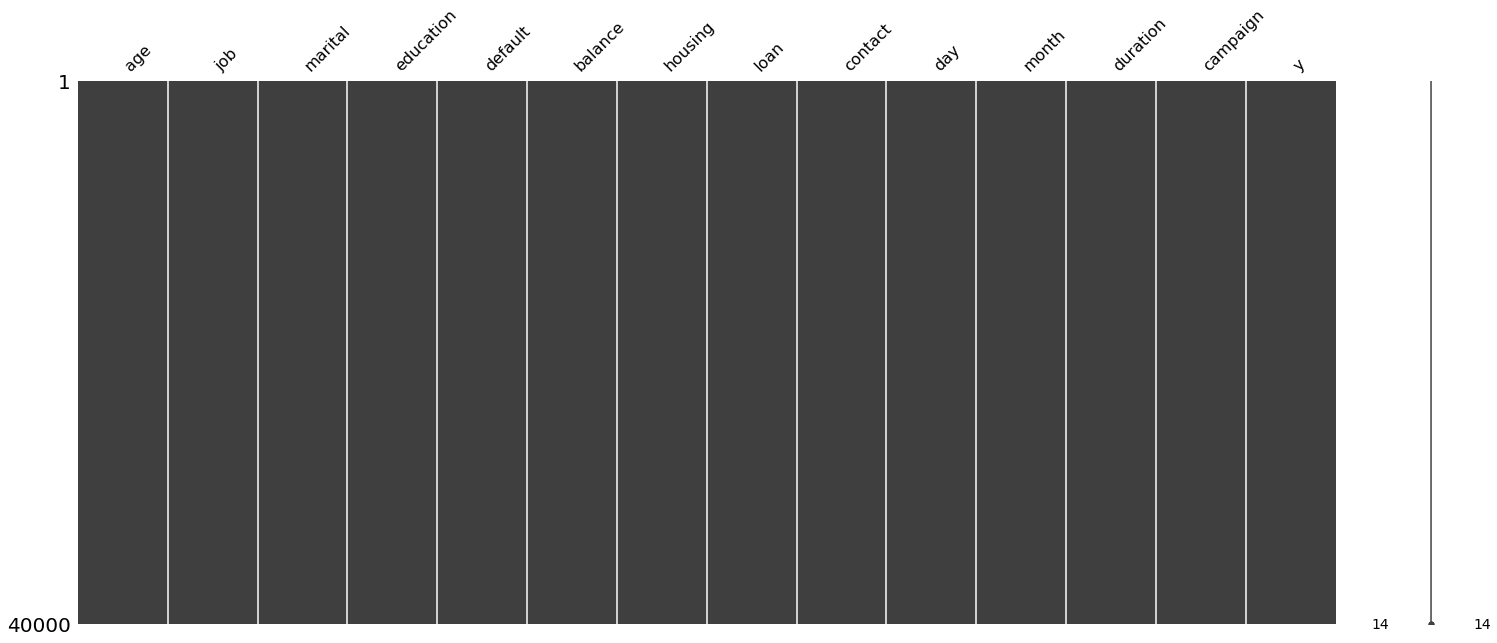

In [8]:
msno.matrix(data) # Kayıp veri bulunmamakta.

## 4. Model için Girdi ve Çıktı Değerlerinin Belirlenmesi

In [10]:
data_copy = data.copy()

In [11]:
X = data_copy.iloc[:,0:-1]

In [12]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1


In [13]:
Y = data_copy.iloc[:,[-1]]

In [14]:
Y.head()

,y
0,no
1,no
2,no
3,no
4,no


### 4.1. Girdi (X) Değerlerinin Düzenlenmesi

#### 4.1.1. Kategorik verilerin sayısal verilere dönüştürülmesi (One Hot Encoding)

In [81]:
def ColumnOneHotEn(dataframe,columnName):
    """
    Description:
    
    Returns applied one hot encoding method Dataframe of columns that columnName

    Parameters:
    
    dataframe (dataframe): Dataframe
    columnName (object) : Dataframe of column
    
    Returns:
    
    dataframe: It has one hot encode data in dataframe of get columnName 
    
    """
    
    new_dataframe = "{0}".format(columnName)
    new_dataframe = pd.get_dummies(dataframe[columnName])

    new_dataframe.columns = ["{0}_{1}".format(columnName,j) for j in new_dataframe.columns]
    
    return new_dataframe

In [103]:
job_oht = ColumnOneHotEn(X,"job")
marital_oht = ColumnOneHotEn(X,"marital")
education_oht = ColumnOneHotEn(X,"education")
contact_oht = ColumnOneHotEn(X,"contact")
month_oht = ColumnOneHotEn(X,"month")
default_oht = ColumnOneHotEn(X,"default").iloc[:,[1]] # --> Sadece tek kolon olarak "yes" kolonunun alınması yeterlidir.
housing_oht = ColumnOneHotEn(X,"housing").iloc[:,[1]] # -- > Sadece tek kolon olarak "yes" kolonunun alınması yeterlidir.
loan_oht = ColumnOneHotEn(X,"loan").iloc[:,[1]] # --> Sadece tek kolon olarak "yes" kolonunun alınması yeterlidir.


In [117]:
x_onehot =pd.concat([job_oht,marital_oht,education_oht,contact_oht,month_oht,default_oht,housing_oht,loan_oht],axis=1)

##### 4.1.2. Sayısal verilerin standardize edilmesi (StandardScaler)

In [120]:
sc = StandardScaler()

balance_standard = sc.fit_transform(X["balance"].values.reshape(-1,1))
duration_standard = sc.fit_transform(X["duration"].values.reshape(-1,1))
campaign_standard = sc.fit_transform(X["campaign"].values.reshape(-1,1))

balance = pd.DataFrame(balance_standard,columns=["balance"])
duration = pd.DataFrame(duration_standard,columns=["duration"])
campaign = pd.DataFrame(campaign_standard,columns=["campaign"])

In [114]:
x_standardscaler = pd.concat([balance,duration,campaign],axis=1)

In [119]:
X_all = pd.concat([x_onehot,x_standardscaler],axis=1)

X_all.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_mar,month_may,month_nov,month_oct,default_yes,housing_yes,loan_yes,balance,duration,campaign
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0.299174,0.023811,-0.581096
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,-0.428854,-0.400305,-0.581096
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,-0.438152,-0.689474,-0.581096
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0.079802,-0.627785,-0.581096
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-0.438497,-0.219092,-0.581096


### 4.2. Çıktı (Y) Değerlerinin Düzenlenmesi

In [125]:
y_one = ColumnOneHotEn(Y,"y").iloc[:,[1]]

Y_all = y_one

Y_all.head()

,y_yes
0,0
1,0
2,0
3,0
4,0


## 5. Sınıflandırma Modelinin Oluşturulması

In [150]:
rf_classifier = RandomForestClassifier(n_estimators=11, random_state=0)

### 5.1. Girdi (X) ve Çıktı (Y) Değerlerinin Ayrılması (K-Fold) ve Modelin Başarısının Ölçümü

In [158]:

kf = KFold(n_splits=5,shuffle=False)   

accuracy_model_result = []
 
for train_index, test_index in kf.split(X_all):
    
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    Y_train, Y_test = Y_all.iloc[train_index], Y_all.iloc[test_index]
    
    
    rf_model = rf_classifier.fit(X_train, Y_train)

    print(accuracy_score(Y_test, rf_model.predict(X_test), normalize=True)*100)
    print(confusion_matrix(Y_test,rf_model.predict(X_test)))


C:\Users\Mahir\anaconda3\envs\Term_Deposit_Case\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


95.42500000000001
[[7516  226]
 [ 140  118]]


C:\Users\Mahir\anaconda3\envs\Term_Deposit_Case\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


94.55
[[7448  118]
 [ 318  116]]


C:\Users\Mahir\anaconda3\envs\Term_Deposit_Case\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


94.65
[[7460  101]
 [ 327  112]]


C:\Users\Mahir\anaconda3\envs\Term_Deposit_Case\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


89.4
[[6959  276]
 [ 572  193]]


C:\Users\Mahir\anaconda3\envs\Term_Deposit_Case\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


88.0625
[[6897  103]
 [ 852  148]]
